In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
# Import control and patient datasets from Excel f
control_data = pd.read_csv("C:\\Users\\giris\\OneDrive\\Desktop\\DLcontrol.csv",encoding= 'unicode_escape')
patient_data = pd.read_csv("C:\\Users\\giris\\OneDrive\\Desktop\\DLpatient.csv",encoding= 'unicode_escape')

In [7]:
control_data = control_data.drop('Content',axis=1)
patient_data = patient_data.drop('Content', axis=1)

In [8]:
columns_to_drop = ["Fixation Average Pupil Diameter [mm]","Port Status","Annotation Name","Annotation Description","Annotation Tags","Mouse Position X [px]","Mouse Position Y [px]","Scroll Direction X","Scroll Direction Y"]
control_data = control_data.drop(columns=columns_to_drop)
patient_data = patient_data.drop(columns=columns_to_drop)

In [9]:
# Add 'label' column with 'healthy' label to control_data
control_data['label'] = '0'

# Add 'label' column with 'unhealthy' label to patient_data
patient_data['label'] = '1'

In [10]:
control_data.head()
patient_data.head()

,Trial,Trial Start Raw Time [ms],Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Color,Tracking Ratio [%],Category Group,Category,...,Saccade End Position Y [px],Saccade Amplitude [°],Saccade Acceleration Average [°/s²],Saccade Acceleration Peak [°/s²],Saccade Deceleration Peak [°/s²],Saccade Velocity Average [°/s],Saccade Velocity Peak [°/s],Saccade Peak Velocity at [%],AOI Name,label
0,Trial001,820934.6,Sitting.PNG,0,2375.9,Latha,DarkTurquoise,100.0,Information,Separator,...,-,-,-,-,-,-,-,-,-,1
1,Trial001,820934.6,Sitting.PNG,0,2375.9,Latha,DarkTurquoise,100.0,Eye,Fixation,...,-,-,-,-,-,-,-,-,White Space,1
2,Trial001,820934.6,Sitting.PNG,0,2375.9,Latha,DarkTurquoise,100.0,Eye,Saccade,...,611.4,13.6,11420.8,22796.7,-18854.4,202.5,489.7,28.6,-,1
3,Trial001,820934.6,Sitting.PNG,0,2375.9,Latha,DarkTurquoise,100.0,Eye,Fixation,...,-,-,-,-,-,-,-,-,White Space,1
4,Trial001,820934.6,Sitting.PNG,0,2375.9,Latha,DarkTurquoise,100.0,Eye,Saccade,...,557.5,18,8456.8,20063,-9325.7,234.7,417.6,25,-,1


In [11]:
df = pd.concat([control_data, patient_data], ignore_index=True)

In [12]:
df

,Trial,Trial Start Raw Time [ms],Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Color,Tracking Ratio [%],Category Group,Category,...,Saccade End Position Y [px],Saccade Amplitude [°],Saccade Acceleration Average [°/s²],Saccade Acceleration Peak [°/s²],Saccade Deceleration Peak [°/s²],Saccade Velocity Average [°/s],Saccade Velocity Peak [°/s],Saccade Peak Velocity at [%],AOI Name,label
0,Trial001,3195372.7,Sitting.PNG,0,7671.4,NT_trial-P01,Gold,81.2,Information,Separator,...,-,-,-,-,-,-,-,-,-,0
1,Trial001,3195372.7,Sitting.PNG,0,7671.4,NT_trial-P01,Gold,81.2,Eye,Blink,...,-,-,-,-,-,-,-,-,-,0
2,Trial001,3195372.7,Sitting.PNG,0,7671.4,NT_trial-P01,Gold,81.2,Eye,Saccade,...,404.7,10.3,10189.1,5779,-40310.2,207.6,1027.9,21,-,0
3,Trial001,3195372.7,Sitting.PNG,0,7671.4,NT_trial-P01,Gold,81.2,Eye,Saccade,...,443.9,1.9,3044.3,4638,-4327.5,50,111.7,45.8,-,0
4,Trial001,3195372.7,Sitting.PNG,0,7671.4,NT_trial-P01,Gold,81.2,Eye,Fixation,...,-,-,-,-,-,-,-,-,White Space,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,Trial014,923657.7,Missing Letter 3.PNG,0,18624.8,Latha,DarkTurquoise,98.9,Eye,Fixation,...,-,-,-,-,-,-,-,-,White Space,1
866,Trial014,923657.7,Missing Letter 3.PNG,0,18624.8,Latha,DarkTurquoise,98.9,Eye,Saccade,...,538.1,0.9,1434,2218.8,-2084.7,40.7,62.9,46.4,-,1
867,Trial014,923657.7,Missing Letter 3.PNG,0,18624.8,Latha,DarkTurquoise,98.9,Eye,Fixation,...,-,-,-,-,-,-,-,-,number,1
868,Trial015,942282.5,RichText1.rtf,0,50.7,Latha,DarkTurquoise,100.0,Information,Separator,...,-,-,-,-,-,-,-,-,-,1


In [13]:
df = df.loc[:, (df != '-').any(axis=0)]

In [14]:
df.replace('-', np.nan)
df

,Trial,Trial Start Raw Time [ms],Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Color,Tracking Ratio [%],Category Group,Category,...,Saccade End Position Y [px],Saccade Amplitude [°],Saccade Acceleration Average [°/s²],Saccade Acceleration Peak [°/s²],Saccade Deceleration Peak [°/s²],Saccade Velocity Average [°/s],Saccade Velocity Peak [°/s],Saccade Peak Velocity at [%],AOI Name,label
0,Trial001,3195372.7,Sitting.PNG,0,7671.4,NT_trial-P01,Gold,81.2,Information,Separator,...,-,-,-,-,-,-,-,-,-,0
1,Trial001,3195372.7,Sitting.PNG,0,7671.4,NT_trial-P01,Gold,81.2,Eye,Blink,...,-,-,-,-,-,-,-,-,-,0
2,Trial001,3195372.7,Sitting.PNG,0,7671.4,NT_trial-P01,Gold,81.2,Eye,Saccade,...,404.7,10.3,10189.1,5779,-40310.2,207.6,1027.9,21,-,0
3,Trial001,3195372.7,Sitting.PNG,0,7671.4,NT_trial-P01,Gold,81.2,Eye,Saccade,...,443.9,1.9,3044.3,4638,-4327.5,50,111.7,45.8,-,0
4,Trial001,3195372.7,Sitting.PNG,0,7671.4,NT_trial-P01,Gold,81.2,Eye,Fixation,...,-,-,-,-,-,-,-,-,White Space,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,Trial014,923657.7,Missing Letter 3.PNG,0,18624.8,Latha,DarkTurquoise,98.9,Eye,Fixation,...,-,-,-,-,-,-,-,-,White Space,1
866,Trial014,923657.7,Missing Letter 3.PNG,0,18624.8,Latha,DarkTurquoise,98.9,Eye,Saccade,...,538.1,0.9,1434,2218.8,-2084.7,40.7,62.9,46.4,-,1
867,Trial014,923657.7,Missing Letter 3.PNG,0,18624.8,Latha,DarkTurquoise,98.9,Eye,Fixation,...,-,-,-,-,-,-,-,-,number,1
868,Trial015,942282.5,RichText1.rtf,0,50.7,Latha,DarkTurquoise,100.0,Information,Separator,...,-,-,-,-,-,-,-,-,-,1


In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

X = df.drop('label', axis=1).values
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, GRU, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 1. Multilayer Perceptron (MLP)
#defining Multilayer Perceptron model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
#compiling
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#fitting
mlp_model.fit(X_train, y_train, epochs=2, batch_size=128)


mlp_predictions = mlp_model.predict(X_test)
MLP_accuracy = mlp_model.evaluate(X_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(MLP_accuracy[0],MLP_accuracy[1]))

Epoch 1/2
6/6 [==============================] - 2s 8ms/step - loss: 39.1759 - accuracy: 0.5503
Epoch 2/2
6/6 [==============================] - 0s 6ms/step - loss: 0.9593 - accuracy: 0.9713
Test set
  Loss: 0.959
  Accuracy: 0.971


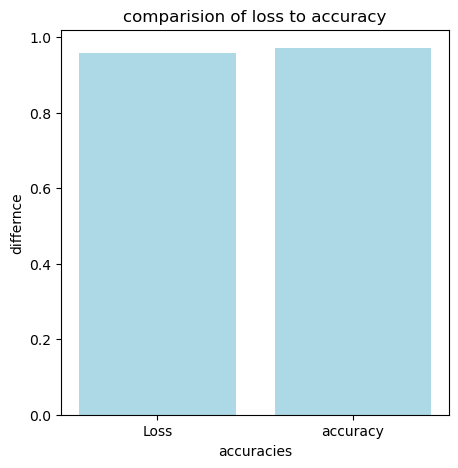

In [17]:
#plotting of loss and accuracy for MLP model
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'Loss':MLP_accuracy[0],'accuracy':MLP_accuracy[1]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(courses, values, color ='lightblue',
		width = 0.8)

plt.xlabel("accuracies")
plt.ylabel("differnce")
plt.title("comparision of loss to accuracy")
plt.show()


In [18]:
# 2.Bidirectional LSTM model
#defining Bidirectional LSTM model
bidirectional_lstm_model = Sequential([
    Bidirectional(LSTM(128), input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

bidirectional_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bidirectional_lstm_model.fit(X_train, y_train, epochs=3, batch_size=98)
bidirectional_lstm_probabilities = bidirectional_lstm_model.predict(X_test)
bidirectional_lstm_predictions = (bidirectional_lstm_probabilities > 0.5).astype(int)
bidirectional_lstm_accuracy = accuracy_score(y_test, bidirectional_lstm_predictions)
bidirectional_accuracy = bidirectional_lstm_model.evaluate(X_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(bidirectional_accuracy[0],bidirectional_accuracy[1]))

Epoch 1/3
8/8 [==============================] - 9s 148ms/step - loss: 0.6654 - accuracy: 0.5690
Epoch 2/3
8/8 [==============================] - 1s 150ms/step - loss: 0.5946 - accuracy: 0.6365
Epoch 3/3
6/6 [==============================] - 2s 24ms/step - loss: 0.4702 - accuracy: 0.8506
Test set
  Loss: 0.470
  Accuracy: 0.851


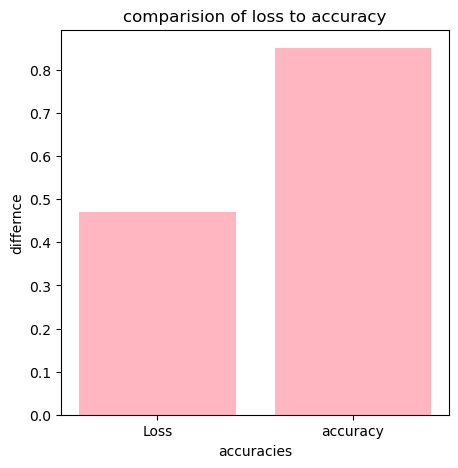

In [19]:
#plotting of loss and accuracy for Bidirectional LSTM model
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'Loss':bidirectional_accuracy[0],'accuracy':bidirectional_accuracy[1]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(courses, values, color ='lightpink',width = 0.8)

plt.xlabel("accuracies")
plt.ylabel("differnce")
plt.title("comparision of loss to accuracy")
plt.show()


In [20]:
# 3.Gated Recurrent Unit (GRU) Network model
#defining GRU model
gru_model = Sequential([
    GRU(128, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.fit(X_train, y_train, epochs=3, batch_size=32)
gru_probabilities = gru_model.predict(X_test)
gru_predictions = (gru_probabilities > 0.5).astype(int)
gru_accuracy1 = accuracy_score(y_test, gru_predictions)
gru_accuracy = gru_model.evaluate(X_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(gru_accuracy[0],gru_accuracy[1]))

Epoch 1/3
22/22 [==============================] - 5s 40ms/step - loss: 0.6834 - accuracy: 0.5761
Epoch 2/3
22/22 [==============================] - 1s 42ms/step - loss: 0.6658 - accuracy: 0.6106
Epoch 3/3
6/6 [==============================] - 1s 16ms/step - loss: 0.6591 - accuracy: 0.6092
Test set
  Loss: 0.659
  Accuracy: 0.609


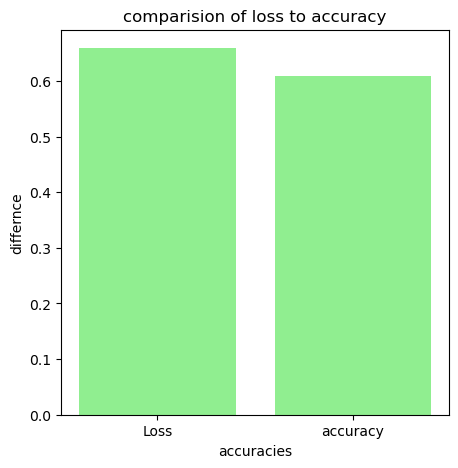

In [21]:
#plotting of loss and accuracy for Gated Recurrent Unit (GRU) Network model
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'Loss':gru_accuracy[0],'accuracy':gru_accuracy[1]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(courses, values, color ='lightgreen',width = 0.8)

plt.xlabel("accuracies")
plt.ylabel("differnce")
plt.title("comparision of loss to accuracy")
plt.show()


In [22]:
# 4.LSTM(RNN) Model
# Long Short-Term Memory (LSTM) Network model
lstm_model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=10, batch_size=128)
lstm_probabilities = lstm_model.predict(X_test)
lstm_predictions = (lstm_probabilities > 0.5).astype(int)
lstm_accuracy = lstm_model.evaluate(X_test, y_test)
# print("Accuracy:", accuracy)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(lstm_accuracy[0],lstm_accuracy[1]))

Epoch 1/10
6/6 [==============================] - 5s 89ms/step - loss: 0.7224 - accuracy: 0.4914
Epoch 2/10
6/6 [==============================] - 1s 86ms/step - loss: 0.6791 - accuracy: 0.5963
Epoch 3/10
6/6 [==============================] - 1s 88ms/step - loss: 0.6704 - accuracy: 0.6049
Epoch 4/10
6/6 [==============================] - 1s 86ms/step - loss: 0.6666 - accuracy: 0.5991
Epoch 5/10
6/6 [==============================] - 1s 89ms/step - loss: 0.6608 - accuracy: 0.5977
Epoch 6/10
6/6 [==============================] - 1s 84ms/step - loss: 0.6532 - accuracy: 0.6063
Epoch 7/10
6/6 [==============================] - 1s 85ms/step - loss: 0.6447 - accuracy: 0.6207
Epoch 8/10
6/6 [==============================] - 1s 90ms/step - loss: 0.6215 - accuracy: 0.6480
Epoch 9/10
6/6 [==============================] - 1s 86ms/step - loss: 0.5983 - accuracy: 0.6710
Epoch 10/10
6/6 [==============================] - 1s 19ms/step - loss: 0.6031 - accuracy: 0.6494
Test set
  Loss: 0.603
  Accu

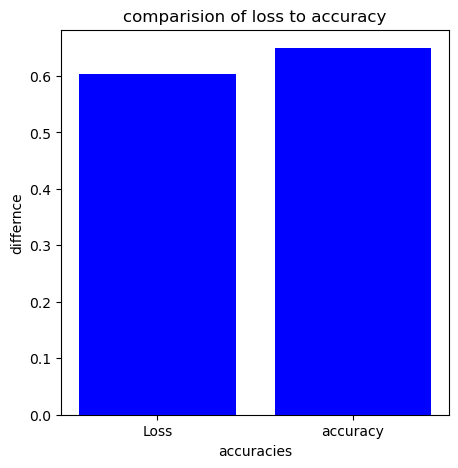

In [23]:
#plotting of loss and accuracy for LSTM(RNN) Model
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'Loss':lstm_accuracy[0],'accuracy':lstm_accuracy[1]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(courses, values, color ='blue',width = 0.8)

plt.xlabel("accuracies")
plt.ylabel("differnce")
plt.title("comparision of loss to accuracy")
plt.show()


In [38]:
# 5.Convolutional Neural Network (CNN) model
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
#defining CNN model
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Create the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3, batch_size=128, validation_data=(X_test, y_test))

cnn_accuracy = model.evaluate(X_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(cnn_accuracy[0],cnn_accuracy[1]))

Epoch 1/3
6/6 [==============================] - 1s 35ms/step - loss: 72.4659 - accuracy: 0.5216 - val_loss: 12.2318 - val_accuracy: 0.6322
Epoch 2/3
6/6 [==============================] - 0s 8ms/step - loss: 50.4025 - accuracy: 0.5690 - val_loss: 5.9783 - val_accuracy: 0.7241
Epoch 3/3
6/6 [==============================] - 0s 2ms/step - loss: 2.8179 - accuracy: 0.8333
Test set
  Loss: 2.818
  Accuracy: 0.833


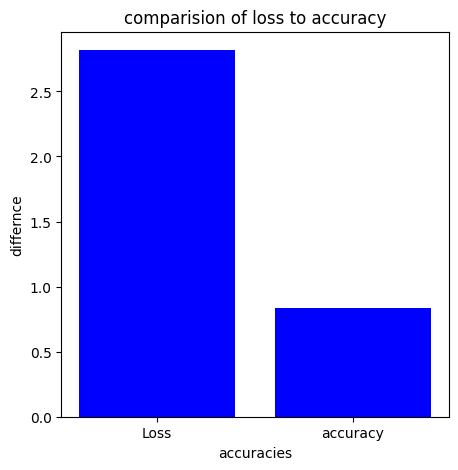

In [39]:
#plotting of loss and accuracy for LSTM(RNN) Model
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'Loss':cnn_accuracy[0],'accuracy':cnn_accuracy[1]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(courses, values, color ='blue',width = 0.8)

plt.xlabel("accuracies")
plt.ylabel("differnce")
plt.title("comparision of loss to accuracy")
plt.show()


In [40]:
# Print the accuracies of the models
print("MLP Accuracy:", MLP_accuracy[1])
print("Bidirectional LSTM Accuracy:", bidirectional_accuracy[1])
print("GRU Accuracy:", gru_accuracy[1])
print("LSTM Accuracy:", lstm_accuracy[1])
print("CNN Accuracy:", cnn_accuracy[1])

MLP Accuracy: 0.9885057210922241
Bidirectional LSTM Accuracy: 0.7471264600753784
GRU Accuracy: 0.5977011322975159
LSTM Accuracy: 0.7011494040489197
CNN Accuracy: 0.8333333134651184


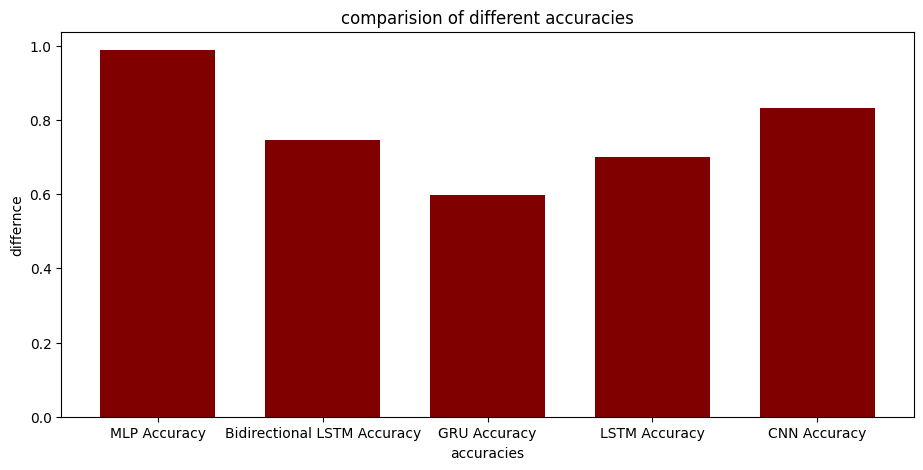

In [41]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'MLP Accuracy':MLP_accuracy[1],'Bidirectional LSTM Accuracy':bidirectional_accuracy[1],'GRU Accuracy':gru_accuracy[1],'LSTM Accuracy':lstm_accuracy[1],'CNN Accuracy':cnn_accuracy[1]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (11, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.7)

plt.xlabel("accuracies")
plt.ylabel("differnce")
plt.title("comparision of different accuracies")
plt.show()
